# CS-UY 3943 - Introduction of Data Science
## Final Project: Tweet Sentiment Extraction

Please edit the cell below to add your name, NetID, assigned group, and group members for this assignment. **Complete this section before proceeding to the assignment questions.**

Name:  Taylor Wong
NetID:  tw1835
Group Member 1:  Thomas Scarola
NetID:  tws285
***

### Working with Time Series 
Here we will analyze a timeseries of number of Yellow Fever cases from an unidentified country by year. The data is from 1700 – 2008. The file **cases.csv** is available in your git repository.

1\. Load the `cases.csv` data set, parse the `YEAR` column as a datetime value, and set `YEAR` as the index of the resulting `DataFrame`. Finally, plot the resulting `DataFrame`. After reading the data into a `pandas` `DataFrame`, execute a line similar to the one below:

```df.index.freq = df.index.inferred_freq```

This assumes that the `DataFrame` that you created is named `df`. This line is necessary to avoid the generation of a large number of warnings when peforming the grid parameter search in question #4.

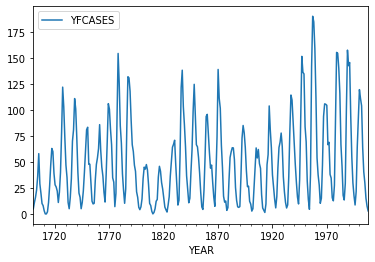

In [47]:
#Place your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

cases = pd.read_csv('cases.csv', parse_dates=['YEAR'], index_col='YEAR')
cases.plot()
plt.show()


In [48]:
cases.index.freq = cases.index.inferred_freq

2\. Autoregressive Moving Average (ARMA) models require that the data being modeled is stationary. Is the yellow fever cases data stationary? Provide evidence for your claim. If the dataset is not stationary, transform the dataset to make it stationary and plot the transformed data set.

In [49]:
# stationary 
# zero trend, variance constant 
# autocorrelation is constant
# non-graphical: ADFuller test 

# import adfuller function 
from statsmodels.tsa.stattools import adfuller
# run function on time series
results = adfuller(cases['YFCASES'])
# print results tuple
print(results)

(-2.837780724938198, 0.05307642172812019, 8, 300, {'1%': -3.4523371197407404, '5%': -2.871222860740741, '10%': -2.571929211111111}, 2430.50034229055)


<p>
<span style="color:blue">
Graphically, it looks like its trending upwards, and that would make it not stationary. also 
1st element of augmented dickey-fuller is 0.05<, so we cant reject that it is non-stationary (aka don't know, but it could be non-stationary)
</span>
</p>

In [50]:
# make stationary by differencing 
cases = cases.diff().dropna()


3\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) of the cases timeseries with 20 lags displayed.

In [59]:
# Place your code here
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


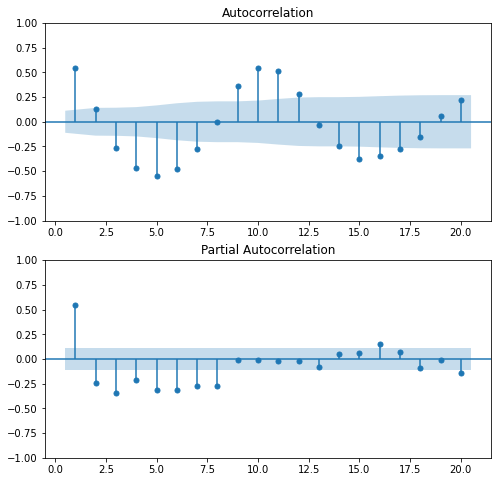

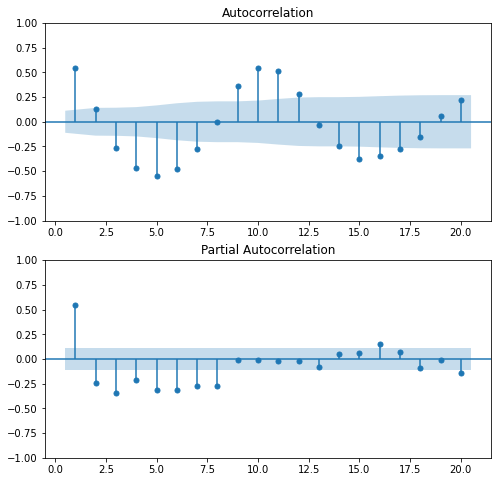

In [60]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
plot_acf(cases, lags=20, zero=False, ax=ax1)
plot_pacf(cases, lags=20, zero=False, ax=ax2)


4\. Describe what the plots indicate (in terms of autoregressive order (_p_) and moving average order (_q_)). 

Recall the following:

| Plot type | AR(p) => ARIMA(p,0,0) | MA(q) => ARIMA(0,0,q) | ARMA(p,q) => ARIMA(p,0,q) |
| :--- | :--- | :--- | :--- |
| ACF | Tails off | Cuts off after lag q | Tails off |
| PACF | Cuts off after lag p| Tails off | Tails off | 

<p>
<span style="color:blue">
Since both ACF and PACF tails off, the model must be an ARMA(p,q) => ARIMA(p,0,q). However, we cannot deduce the model order values from the plot    
</span>
</p>

5\. Use the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to determine the best ARMA parameters for the model. Be sure to use any transformations applied previously when performing model selection.


1. Perform a grid search on ARMA parameters _p_ (from 0 - 10) and _q_ (from 0 - 10) 
1. Instantiate an ARMA(p,q) model for each pair of parameters. Use the `SARIMAX` constructor with the `order` parameter specified as `(p,0,q)` for each model and the `trend` parameter set to `'c'`.
1. Fit the model to the yellow fever cases data. Use the parameter `method='powell'` when calling the model's `.fit()` method. This optimization routine performs well with this dataset.
1. Store the AIC and BIC values for each model (**HINT**: using a `DataFrame` will make display of sorted values simpler)
1. Print the sorted results in increasing order based on the models' **AIC** values (in a different notebook cell than the parameter search)
1. Also, print the sorted results in increasing order based on the models' **BIC** values (in a different notebook cell than the parameter search)

**NOTE**: Some parameter choices will produce warnings. You can ignore these warnings for the purposes of this exercise. 

Recall the following:

| Criterion | Description | Evaluation | Strengths |
| :--- | :--- | :--- | :--- |
| AIC | measures model quality | lower score, better model | chooses better predictive models |
| BIC | measures model quality | lower score, better model | chooses better explanatory models | 

Do the computed AIC and BIC values for the models confirm or cause you to revise your interpretation of the ACF and PACF plots?

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Place your code here

order_aic_bic = []

# loop over AR order
for p in range(11):
    # loop over MA order 
    for q in range(11):
        try:
            # fit model
            model = SARIMAX(cases, order=(p,0,q), trend='c')
            results = model.fit(method='powell')
            # Add order and scores to list
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            # Add order, without AIC/BIC when failed
            order_aic_bic.append((p, q, None, None))
            
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])



Optimization terminated successfully.
         Current function value: 4.595967
         Iterations: 1
         Function evaluations: 70
Optimization terminated successfully.
         Current function value: 4.443634
         Iterations: 2
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 4.388250
         Iterations: 2
         Function evaluations: 86
Optimization terminated successfully.
         Current function value: 4.392569
         Iterations: 6
         Function evaluations: 345
Optimization terminated successfully.
         Current function value: 4.314757
         Iterations: 6
         Function evaluations: 413


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.271938
         Iterations: 8
         Function evaluations: 634


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.260434
         Iterations: 8
         Function evaluations: 713


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.259285
         Iterations: 8
         Function evaluations: 802
Optimization terminated successfully.
         Current function value: 4.256392
         Iterations: 3
         Function evaluations: 329
Optimization terminated successfully.
         Current function value: 4.235620
         Iterations: 6
         Function evaluations: 736
Optimization terminated successfully.
         Current function value: 4.230890
         Iterations: 10
         Function evaluations: 1345
Optimization terminated successfully.
         Current function value: 4.423198
         Iterations: 1
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 4.410054
         Iterations: 2
         Function evaluations: 87
Optimization terminated successfully.
         Current function value: 4.379646
         Iterations: 3
         Function evaluations: 234


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.294256
         Iterations: 15
         Function evaluations: 1026


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.280250
         Iterations: 11
         Function evaluations: 881


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.264956
         Iterations: 10
         Function evaluations: 897


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.258089
         Iterations: 7
         Function evaluations: 701
Optimization terminated successfully.
         Current function value: 4.254975
         Iterations: 3
         Function evaluations: 414
Optimization terminated successfully.
         Current function value: 4.255332
         Iterations: 4
         Function evaluations: 540


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.230489
         Iterations: 10
         Function evaluations: 1322


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.232295
         Iterations: 6
         Function evaluations: 847
Optimization terminated successfully.
         Current function value: 4.394409
         Iterations: 1
         Function evaluations: 46


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.224116
         Iterations: 14
         Function evaluations: 819


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.167519
         Iterations: 7
         Function evaluations: 471


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.211754
         Iterations: 13
         Function evaluations: 1058
Optimization terminated successfully.
         Current function value: 4.157056
         Iterations: 4
         Function evaluations: 371
Optimization terminated successfully.
         Current function value: 4.143215
         Iterations: 4
         Function evaluations: 410
Optimization terminated successfully.
         Current function value: 4.143052
         Iterations: 5
         Function evaluations: 554
Optimization terminated successfully.
         Current function value: 4.143020
         Iterations: 4
         Function evaluations: 485
Optimization terminated successfully.
         Current function value: 4.156894
         Iterations: 4
         Function evaluations: 536
Optimization terminated successfully.
         Current function value: 4.142487
         Iterations: 7
         Function evaluations: 1000
Optimization terminated success

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.206054
         Iterations: 4
         Function evaluations: 332


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.165027
         Iterations: 8
         Function evaluations: 742
Optimization terminated successfully.
         Current function value: 4.153588
         Iterations: 3
         Function evaluations: 309
Optimization terminated successfully.
         Current function value: 4.145519
         Iterations: 4
         Function evaluations: 453
Optimization terminated successfully.
         Current function value: 4.143081
         Iterations: 3
         Function evaluations: 373
Optimization terminated successfully.
         Current function value: 4.142989
         Iterations: 4
         Function evaluations: 544
Optimization terminated successfully.
         Current function value: 4.142892
         Iterations: 5
         Function evaluations: 722
Optimization terminated successfully.
         Current function value: 4.137908
         Iterations: 6
         Function evaluations: 954
Optimization terminated successful

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.196546
         Iterations: 4
         Function evaluations: 366


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.158952
         Iterations: 14
         Function evaluations: 1487
Optimization terminated successfully.
         Current function value: 4.149379
         Iterations: 3
         Function evaluations: 344
Optimization terminated successfully.
         Current function value: 4.146712
         Iterations: 4
         Function evaluations: 500
Optimization terminated successfully.
         Current function value: 4.143752
         Iterations: 3
         Function evaluations: 405
Optimization terminated successfully.
         Current function value: 4.143156
         Iterations: 3
         Function evaluations: 448
Optimization terminated successfully.
         Current function value: 4.142744
         Iterations: 4
         Function evaluations: 637
Optimization terminated successfully.
         Current function value: 4.137278
         Iterations: 6
         Function evaluations: 1013
Optimization terminated success

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.179822
         Iterations: 4
         Function evaluations: 420


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.185112
         Iterations: 6
         Function evaluations: 696
Optimization terminated successfully.
         Current function value: 4.146460
         Iterations: 5
         Function evaluations: 616
Optimization terminated successfully.
         Current function value: 4.146037
         Iterations: 4
         Function evaluations: 536
Optimization terminated successfully.
         Current function value: 4.144481
         Iterations: 3
         Function evaluations: 436
Optimization terminated successfully.
         Current function value: 4.143881
         Iterations: 3
         Function evaluations: 474
Optimization terminated successfully.
         Current function value: 4.142300
         Iterations: 4
         Function evaluations: 683
Optimization terminated successfully.
         Current function value: 4.136782
         Iterations: 5
         Function evaluations: 896
Optimization terminated successful

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.140121
         Iterations: 10
         Function evaluations: 1257
Optimization terminated successfully.
         Current function value: 4.143868
         Iterations: 3
         Function evaluations: 409
Optimization terminated successfully.
         Current function value: 4.141457
         Iterations: 8
         Function evaluations: 1215
Optimization terminated successfully.
         Current function value: 4.122870
         Iterations: 4
         Function evaluations: 687
Optimization terminated successfully.
         Current function value: 4.118747
         Iterations: 5
         Function evaluations: 908
Optimization terminated successfully.
         Current function value: 4.104575
         Iterations: 10
         Function evaluations: 1860
Optimization terminated successfully.
         Current function value: 4.104046
         Iterations: 10
         Function evaluations: 1975
Optimization terminated suc

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.137989
         Iterations: 13
         Function evaluations: 1799
Optimization terminated successfully.
         Current function value: 4.143926
         Iterations: 2
         Function evaluations: 297
Optimization terminated successfully.
         Current function value: 4.123963
         Iterations: 9
         Function evaluations: 1494
Optimization terminated successfully.
         Current function value: 4.113117
         Iterations: 9
         Function evaluations: 1638
Optimization terminated successfully.
         Current function value: 4.108840
         Iterations: 8
         Function evaluations: 1500
Optimization terminated successfully.
         Current function value: 4.106024
         Iterations: 8
         Function evaluations: 1589
Optimization terminated successfully.
         Current function value: 4.103648
         Iterations: 8
         Function evaluations: 1686
Optimization terminated suc

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.132601
         Iterations: 3
         Function evaluations: 539


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.132595
         Iterations: 3
         Function evaluations: 569


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.132383
         Iterations: 3
         Function evaluations: 605


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.107651
         Iterations: 13
         Function evaluations: 2826
Optimization terminated successfully.
         Current function value: 4.103895
         Iterations: 6
         Function evaluations: 1376


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.109184
         Iterations: 9
         Function evaluations: 2149
Optimization terminated successfully.
         Current function value: 4.133688
         Iterations: 1
         Function evaluations: 141
Optimization terminated successfully.
         Current function value: 4.133807
         Iterations: 2
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 4.133584
         Iterations: 2
         Function evaluations: 322
Optimization terminated successfully.
         Current function value: 4.133525
         Iterations: 3
         Function evaluations: 521
Optimization terminated successfully.
         Current function value: 4.133295
         Iterations: 2
         Function evaluations: 368


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.132563
         Iterations: 3
         Function evaluations: 572


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.132560
         Iterations: 3
         Function evaluations: 605


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.132346
         Iterations: 3
         Function evaluations: 637


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.110793
         Iterations: 11
         Function evaluations: 2506
Optimization terminated successfully.
         Current function value: 4.105165
         Iterations: 6
         Function evaluations: 1443


/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.109405
         Iterations: 9
         Function evaluations: 2240


In [64]:
# Print the sorted results in increasing order based on the models' AIC values 
print(order_df.sort_values('aic'))


    p  q          aic          bic
74  6  8  2560.417936  2620.099533
75  6  9  2562.092140  2625.503836
84  7  7  2563.045504  2622.727101
95  8  7  2563.289460  2626.701156
85  7  8  2563.310633  2626.722329
.. .. ..          ...          ...
3   0  3  2715.822744  2734.473242
12  1  1  2724.593570  2739.513969
11  1  0  2730.689777  2741.880077
1   0  1  2743.278277  2754.468576
0   0  0  2835.115773  2842.575973

[121 rows x 4 columns]


In [65]:
# Also, print the sorted results in increasing order based on the models' BIC values 
print(order_df.sort_values('bic'))


    p  q          aic          bic
24  2  2  2579.191644  2601.572243
27  2  5  2570.220177  2603.791075
88  8  0  2566.747585  2604.048582
26  2  4  2576.746524  2606.587322
67  6  1  2574.467528  2608.038426
.. .. ..          ...          ...
3   0  3  2715.822744  2734.473242
12  1  1  2724.593570  2739.513969
11  1  0  2730.689777  2741.880077
1   0  1  2743.278277  2754.468576
0   0  0  2835.115773  2842.575973

[121 rows x 4 columns]


<p>
<span style="color:blue">
They confirm my interpretation of the ACF and PACF plots, as being of the ARMA model</span>
</p>

6\. Build each of the 2 models selected based on the best AIC and BIC values from the parameter search. Fit each model to the data, calculate each models mean absolute error (MAE), and plot the diagnostics of the model to determine how well it fits the observed data. What are the key takeaways from the diagnostics plot in relation to the fit of the models? Which model would you chose to perform your forecast of yellow fever cases?

Optimization terminated successfully.
         Current function value: 4.104575
         Iterations: 10
         Function evaluations: 1860
AIC-based model MAE:  10.922874225485957


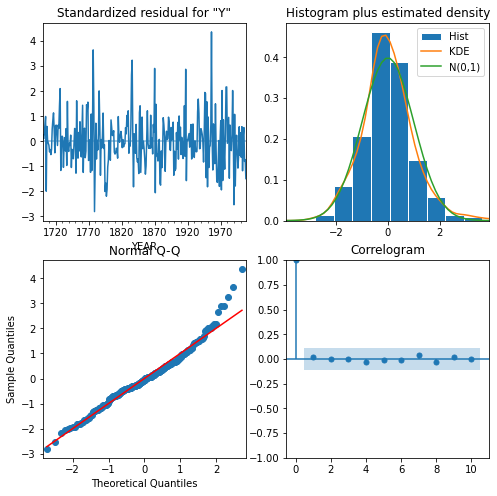

In [62]:
# Place your code here

# Build AIC-based model

# Instantiate model object, feed it the data + define the model order
model = SARIMAX(cases, order=(6,0,8), trend='c')

# Fit model
results = model.fit(method='powell')

# get residuals to calculate MAE
residuals = results.resid
# Calculate mean absolute error of the residuals
mae = np.mean(np.abs(residuals))
print("AIC-based model MAE: ", mae)

# .plot_diagnostics(): Create the 4 common diagnostic plots for evaluating the above
results.plot_diagnostics(figsize=(8,8))
plt.show()

/Users/taylorwong/opt/anaconda3/envs/introds/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Optimization terminated successfully.
         Current function value: 4.167519
         Iterations: 7
         Function evaluations: 471
BIC-based model MAE:  11.686617934404932


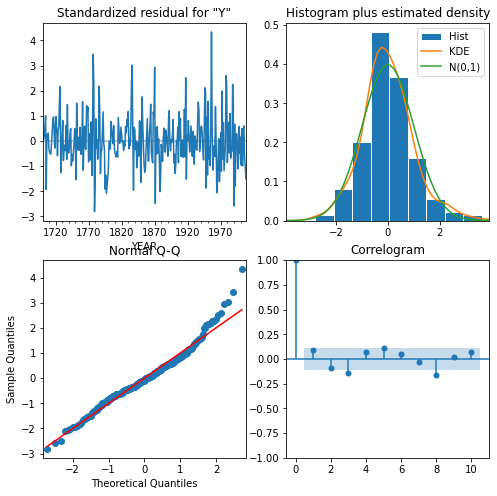

In [63]:
# Place your code here

# Build BIC-based model

# Instantiate model object, feed it the data + define the model order
model = SARIMAX(cases, order=(2,0,2), trend='c')

# Fit model
results = model.fit(method='powell')

# get residuals to calculate MAE
residuals = results.resid
# Calculate mean absolute error of the residuals
mae = np.mean(np.abs(residuals))
print("BIC-based model MAE: ", mae)

# .plot_diagnostics(): Create the 4 common diagnostic plots for evaluating the above
results.plot_diagnostics(figsize=(8,8))
plt.show()

<p>
<span style="color:blue">
in both the AIC-based and BIC-based models: <br>
1) based on the standardized residual plot, there is no obvious pattern in the residuals (good)
<br>
2) histogram: KDE and normal distribution line match up closely (good)
<br>
3) normal Q-Q: points lie closely along the line, which means the residuals are normally distributed (also good) <br>
<br>
the AIC-based model is better due to its correlogram: it has no structure, and all the lags after lag-0 are not significant (good)
</span>
</p>